# Decision Regions

There are many machine learning algorithms, each with very different properties. How can we gain better understanding of how a given algorithm "sees" the data? In this course, we won't study the mathematical structure of our algorithms, but we can in certain cases visualize how they work. 

In this lecture, we'll take a look at the **decision regions** of various classifiers. The decision regions are just the parts of data space that the classifier assigns to each label. As we'll see, different classifiers can create very different decision regions, even when they are trained on the same input data. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Grabbing the data

In [3]:
import urllib
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. The intended values of url are:     
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)
        
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv")
penguins = pd.read_csv("data.csv")
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## Data Prep

For our purposes today, it's useful to encode the three penguin species with labels 0, 1, and 2. We are going to focus on modeling using only two predictor variables today, the culmen length and depth. We use `df.dropna()` to drop the two penguins for which these variables were not measured. 

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins['Species'] = le.fit_transform(penguins['Species'])

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int64

In [5]:
penguins = penguins.dropna(subset = ['Culmen Length (mm)',
                                     'Culmen Depth (mm)'])

X = penguins[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = penguins['Species']

In [7]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

Now let's take a look! Encoding the species as integers 0, 1, 2 makes it easy to create a scatterplot by species, but difficult to add an informative legend. We aren't going to worry about the exact species right now, so we'll just think of them as blue, green, and red. 

[Text(0, 0.5, 'Culmen Depth (mm)'), Text(0.5, 0, 'Culmen Length (mm)')]

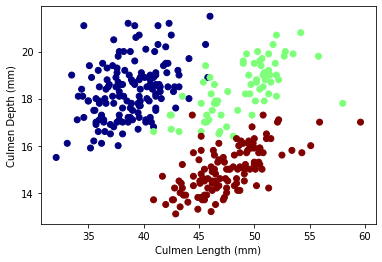

In [9]:
fig, ax = plt.subplots(1)

ax.scatter(X['Culmen Length (mm)'], 
           X['Culmen Depth (mm)'], 
           c = penguins['Species'],
           cmap = "jet")

ax.set(xlabel = "Culmen Length (mm)", 
       ylabel = "Culmen Depth (mm)")

Now let's write a function to visualize the decision regions for classifiers against data. This function will train a model, and then ask it to classify each point on a 2d grid. The set of points where the model returns "0", for example, is the decision region for 0. The contours along which different decision regions meet are called **decision boundaries.**

In [13]:
def plot_regions(c, X, y):
    """
    Plots the decision regions from a classifer 
    underneath the data in X and y. 
    c: a classifier
    X: predictor variables
    y: target variables
    """
    
    # fit the model to the data
    c.fit(X, y)
    
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d

    p = c.predict(np.c_[xx.ravel(), yy.ravel()])
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet")
    
    ax.set(xlabel = "Culmen Length (mm)",
           ylabel = "Culmen Depth (mm)")

## Decision Trees

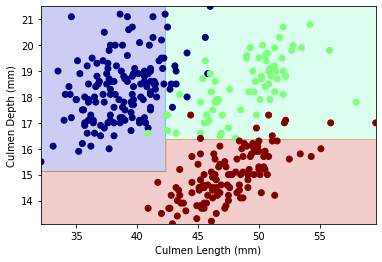

In [14]:
from sklearn import tree
T = tree.DecisionTreeClassifier(max_depth = 2)
plot_regions(T, X, y)

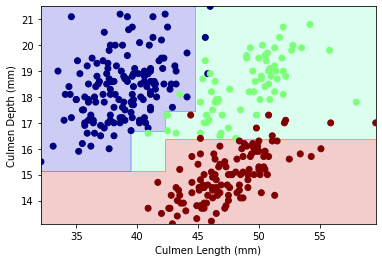

In [15]:
T = tree.DecisionTreeClassifier(max_depth = 4)
plot_regions(T, X, y)

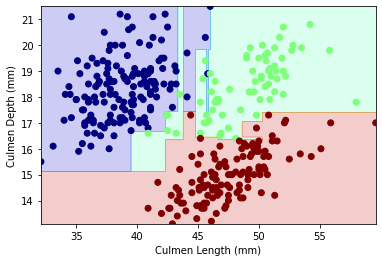

In [16]:
T = tree.DecisionTreeClassifier(max_depth = 50)
plot_regions(T, X, y)

## Random Forests

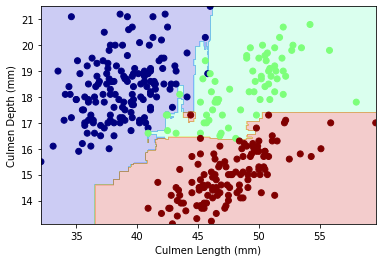

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
plot_regions(RF, X, y)

## Logistic Regression

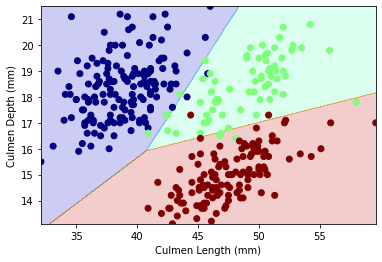

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
plot_regions(LR, X, y)

## Support Vector Machines

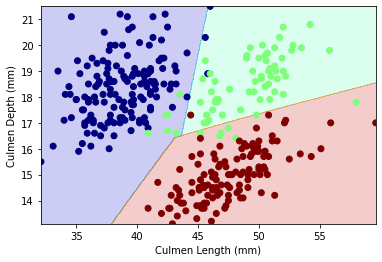

In [20]:
from sklearn import svm
SVM = svm.SVC()
plot_regions(SVM, X, y)

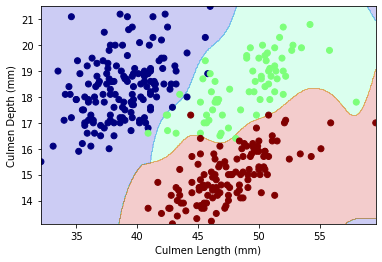

In [21]:
SVM = svm.SVC(gamma = 0.2)
plot_regions(SVM, X, y)

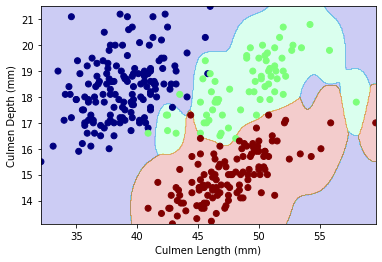

In [22]:
SVM = svm.SVC(gamma = 1.0)
plot_regions(SVM, X, y)

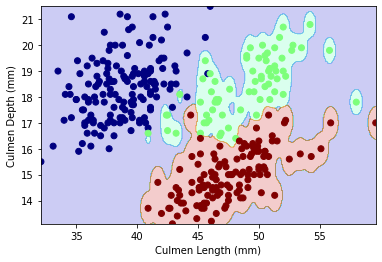

In [23]:
SVM = svm.SVC(gamma = 5.0)
plot_regions(SVM, X, y)

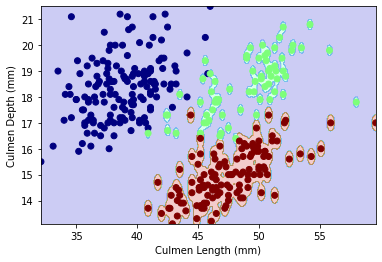

In [24]:
SVM = svm.SVC(gamma = 20.0)
plot_regions(SVM, X, y)